In [1]:
import json
import keras
from pprint import pprint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
json_file = open('Team5_Microsoft.json')
json_str = json_file.read()
data = json.loads(json_str)

texts = list(data['text'].values())
labels = list(data['sentiment'].values())
labels = keras.utils.to_categorical(labels, 3)
print(labels)

[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1.  0.]
 [ 0.  1. 

In [3]:
maxlen = 100  # We will cut reviews after 100 words
training_samples = 200  # We will be training on 200 samples
validation_samples = 10000  # We will be validating on 10000 samples
max_words = 10000  # We will only consider the top 10,000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 1689 unique tokens.


In [4]:
data = pad_sequences(sequences, maxlen=maxlen)
label = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', label.shape)

Shape of data tensor: (178, 100)
Shape of label tensor: (178, 3)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2)

In [6]:
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (142, 100)
Shape of X_test:  (36, 100)
Shape of y_train:  (142, 3)
Shape of y_test:  (36, 3)


In [7]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

In [7]:
max_features = 10000
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(3, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 99        
Total params: 322,179
Trainable params: 322,179
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    batch_size=32)

Epoch 1/30
142/142 [==============================] - 2s 12ms/step - loss: 0.6790 - acc: 0.5962
Epoch 2/30
142/142 [==============================] - 0s 1ms/step - loss: 0.5807 - acc: 0.7700
Epoch 3/30
142/142 [==============================] - 0s 1ms/step - loss: 0.5228 - acc: 0.8732
Epoch 4/30
142/142 [==============================] - 0s 1ms/step - loss: 0.4595 - acc: 0.8991
Epoch 5/30
142/142 [==============================] - 0s 1ms/step - loss: 0.4007 - acc: 0.9484
Epoch 6/30
142/142 [==============================] - 0s 1ms/step - loss: 0.3778 - acc: 0.9296
Epoch 7/30
142/142 [==============================] - 0s 1ms/step - loss: 0.3608 - acc: 0.9366
Epoch 8/30
142/142 [==============================] - 0s 1ms/step - loss: 0.3120 - acc: 0.9695
Epoch 9/30
142/142 [==============================] - 0s 1ms/step - loss: 0.2809 - acc: 0.9789
Epoch 10/30
142/142 [==============================] - 0s 1ms/step - loss: 0.2793 - acc: 0.9624
Epoch 11/30
142/142 [===========================

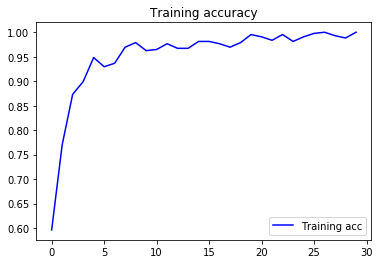

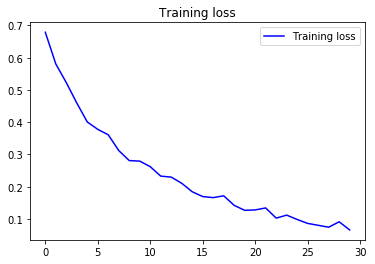

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
# val_acc = history.history['val_acc']
loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [10]:
test_loss, test_score = model.evaluate(X_test, y_test, batch_size=32)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

36/36 [==============================] - 0s 2ms/step
Loss on test set:  0.587709943453
Accuracy on test set:  0.694444444444


In [16]:
import numpy as np
preds = model.predict(X_test, batch_size=16)
preds = np.argmax(preds, axis=-1)
original_label = np.argmax(y_test, axis=-1) 
print(preds.shape)
print(preds)
print(original_label.shape)
print(original_label)

(36,)
[1 0 1 0 1 1 1 0 1 1 0 0 1 1 2 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 2 1 0 1 0 1]
(36,)
[1 0 1 0 0 1 1 0 1 2 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1]


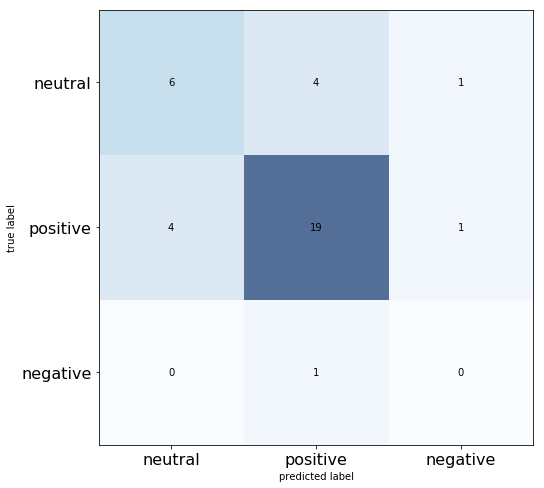

In [18]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm=confusion_matrix(original_label, preds)
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True, alpha=0.7,cmap=plt.cm.Blues)
plt.xticks(range(3), ['neutral', 'positive', 'negative'], fontsize=16)
plt.yticks(range(3), ['neutral', 'positive', 'negative'], fontsize=16)
plt.show()